# Tarea 2 - Named Entity Recognition

----------------------

- **Nombre: Nelson Bruno Moreno Cabañas**

- **Link de repositorio de GitHub:`https://github.com/Bruno-Moreno/LabProgra`** 



## Introducción a la tarea

### Objetivo


El objetivo de esta tarea es resolver una de las tasks mas importantes de Sequence Labelling: [Named Entity Recognition (NER)](http://www.cs.columbia.edu/~mcollins/cs4705-spring2019/slides/tagging.pdf). 

En particular, deberán participar, al igual que en la tarea anterior, en una competencia en donde deberán crear distintos modelos que apunten a resolver NER en español. Para esto, les proveeremos un dataset de NER de noticias etiquetadas en español mas este baseline en donde podrán comenzar a trabajar. 

Esperamos que (por lo menos) utilizen Redes Neuronales Recurrentes (RNN) para resolverla. Nuevamente, hay total libertad para utilizar software y los modelos que deseen, siempre y cuando estos no traigan los modelos ya implementados (como el caso de spacy).


**¿Qué es Sequence Labelling?** 

En breves palabras, dada una secuencia de tokens (frase u oración) sequence labelling tiene por objetivo asignar una etiqueta a cada token de dicha secuencia.

**Named Entity Recognition (NER)**

Esta tarea consiste en localizar y clasificar los tokens de una oración que representen entidades nombradas. Es decir, tokens que simbolicen (1) **personas**, (2) **organizaciones**, (3) **lugares** y (4) **adjetivos, eventos y otras entidades que no entren en las categorías anteriores** deberán ser taggeados como (1) **PER**, (2) **ORG**, (3) **LOC** y (4) **MISC** respectivamente. Adicionalmente, dado que existen entidades representadas en más de un token (como La Serena), se utiliza la notación BIO como prefijo al tag: Beginning, Inside, Outside. Es decir, si encuentro una entidad, el primer token etiquetado será precedido por B, el segundo por I y los n restantes por I. Por otra parte, si el token no representa ninguna entidad nombrada, se representa por O. Un ejemplo de esto es:

Por ejemplo:

```
Felipe B-PER
Bravo I-PER
es O
el O
profesor O
de O
PLN B-MISC
de O
la O
Universidad B-ORG
de I-ORG
Chile I-ORG
. O
```

Estos links son los más indicados para comenzar:

-  [Tagging, and Hidden Markov Models ](http://www.cs.columbia.edu/~mcollins/cs4705-spring2019/slides/tagging.pdf) (slides by Michael Collins), [notes](http://www.cs.columbia.edu/~mcollins/hmms-spring2013.pdf), [video 1](https://youtu.be/-ngfOZz8yK0), [video 2](https://youtu.be/PLoLKQwkONw), [video 3](https://youtu.be/aaa5Qoi8Vco), [video 4](https://youtu.be/4pKWIDkF_6Y)       
-  [Recurrent Neural Networks](slides/NLP-RNN.pdf) | [video 1](https://youtu.be/BmhjUkzz3nk), [video 2](https://youtu.be/z43YFR1iIvk), [video 3](https://youtu.be/7L5JxQdwNJk)


Recuerden que todo el material se encuentra disponible en el [github del curso](https://github.com/dccuchile/CC6205).

### Reglas de la tarea

Algunos detalles de la competencia:

- Para que su tarea sea evaluada, deben participar en la competencia como también, enviar este notebook con su informe.
- Para participar, deben registrarse en la competencia en Codalab en grupos de máximo 2 alumnos. Cada grupo debe tener un nombre de equipo. (¡Y deben reportarlo en su informe!)
- Las métricas usadas serán Precisión, Recall y F1.
- En esta tarea se recomienda usar GPU. Pueden ejecutar su tarea en colab (lo cual trae todo instalado) o pueden intentar correrlo en su computador. en este caso, deberá ser compatible con cuda y deberán instalar todo por su cuenta.
- En total pueden hacer un **máximo de 4 envíos**.
- Por favor, todas sus dudas haganlas en el hilo de U-cursos de la tarea. Los emails que lleguen al equipo docente serán remitidos a ese medio. Recuerden el ánimo colaborativo del curso!!
- Estar top 5 en alguna métrica equivale a 1 punto extra en la nota final.


**Link a la competencia:  https://competitions.codalab.org/competitions/25302?secret_key=690406c7-b3b0-4092-8694-d08d7991ca94**

### Modelos

La RNN del baseline adjunto a este notebook está programado en [`pytorch`](https://pytorch.org/) y contiene:

- La carga los datasets, creación de batches de texto y padding. En resumen, carga los datos y los deja listo para entrenar la red.
- La implementación básica de una red `LSTM` simple de solo un nivel y sin bi-direccionalidad. 
- La construcción un output para que lo puedan probar en la tarea en codelab.



roponer algunos experimentos a hacer:
(cambiar el batch size, dimensiones de las capas, cambiar el tipo de
RNN, cambiar el optimizer, usar una CRF loss, usar embeddings
pre-entrenados, usar BERT??). Quizás podemos sugerir usar algo como
https://github.com/flairNLP/flair

Se espera que ustedes experimenten con el baseline utilizando (pero no limitándose) estas sugerencias:

*   Probar Early stopping
*   Variar la cantidad de parámetros de la capa de embeddings.
*   Variar la cantidad de capas RNN.
*   Variar la cantidad de parámetros de las capas de RNN.
*   Inicializar la capa de embeddings con modelos pre-entrenados. (word2vec, glove, conceptnet, etc...).[Guía breve aquí](https://github.com/dccuchile/spanish-word-embeddings), [Embeddings en español aquí](https://github.com/dccuchile/spanish-word-embeddings).
*   Variar la cantidad de épocas de entrenamiento.
*   Variar el optimizador, learning rate, batch size, usar CRF loss, etc...
*   Probar bi-direccionalidad.
*   Probar teacher forcing.
*   Incluir dropout.
*   Probar modelos de tipo GRU
*   Probar Embedding Contextuales (les puede ser de utilidad [flair](https://github.com/flairNLP/flair))
*   Probar modelos de transformers en español usando [Huggingface](https://github.com/huggingface/transformers)


-----------------------------------------

## Experimentos


El código que les entregaremos servirá de baseline para luego implementar mejores modelos. 
En general, el código asociado a la carga de los datos, las funciones de entrenamiento, de evaluación y la predicción de los datos de la competencia no deberían cambiar. 
Solo deben preocuparse de cambiar la arquitectura del modelo, sus hiperparámetros y reportar, lo cual lo pueden hacer en las subsecciones *modelos*.



###  Carga de datos y Preprocesamiento

Para cargar los datos y preprocesarlos usaremos la librería [`torchtext`](https://github.com/pytorch/text).
En particular usaremos su módulo `data`, el cual según su documentación original provee: 

    - Ability to describe declaratively how to load a custom NLP dataset that's in a "normal" format
    - Ability to define a preprocessing pipeline
    - Batching, padding, and numericalizing (including building a vocabulary object)
    - Wrapper for dataset splits (train, validation, test)


El proceso será el siguiente: 

1. Descargar los datos desde github y examinarlos.
2. Definir los campos (`fields`) que cargaremos desde los archivos.
3. Cargar los datasets.
4. Crear el vocabulario.



In [ ]:
# Instalar torchtext (en codalab) - Descomentar.
!pip3 install --upgrade torchtext

Requirement already up-to-date: torchtext in /usr/local/lib/python3.7/dist-packages (0.10.0)


In [ ]:
import torch
from torchtext.legacy import data, datasets


# Garantizar reproducibilidad 
SEED = 1234
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

#### Obtener datos

Descargamos los datos de entrenamiento, validación y prueba en nuestro directorio de trabajo

In [ ]:
%%capture
!wget https://github.com/dccuchile/CC6205/releases/download/Data/train_NER_esp.txt -nc # Dataset de Entrenamiento
!wget https://github.com/dccuchile/CC6205/releases/download/Data/val_NER_esp.txt -nc    # Dataset de Validación (Para probar y ajustar el modelo)
!wget https://github.com/dccuchile/CC6205/releases/download/Data/test_NER_esp.txt -nc  # Dataset de la Competencia. Estos datos solo contienen los tokens. ¡¡SON LOS QUE DEBEN SER PREDICHOS!!

####  Fields

Un `field`:

* Define un tipo de datos junto con instrucciones para convertir el texto a Tensor.
* Contiene un objeto `Vocab` que contiene el vocabulario (palabras posibles que puede tomar ese campo).
* Contiene otros parámetros relacionados con la forma en que se debe numericalizar un tipo de datos, como un método de tokenización y el tipo de Tensor que se debe producir.


Analizemos el siguiente cuadro el cual contiene un ejemplo cualquiera de entrenamiento:


```
El O
Abogado B-PER
General I-PER
del I-PER
Estado I-PER
, O
Daryl B-PER
Williams I-PER
```

Cada linea contiene una palabra y su clase. Para que `torchtext` pueda cargar estos datos, debemos definir como va a leer y separar los componentes de cada una de las lineas.
Para esto, definiremos un field para cada uno de esos componentes: Las palabras (`TEXT`) y los NER_TAGS (`clase`).


In [ ]:
# Primer Field: TEXT. Representan los tokens de la secuencia
TEXT = data.Field(lower=False) 

# Segundo Field: NER_TAGS. Representan los Tags asociados a cada palabra.
NER_TAGS = data.Field(unk_token=None)

fields = (("text", TEXT), ("nertags", NER_TAGS))

####  SequenceTaggingDataset

`SequenceTaggingDataset` es una clase de torchtext diseñada para contener datasets de sequence labelling. 
Los ejemplos que se guarden en una instancia de estos serán arreglos de palabras pareados con sus respectivos tags.
Por ejemplo, para Part-of-speech tagging:

[I, love, PyTorch, .] estará pareado con [PRON, VERB, PROPN, PUNCT]


La idea es que usando los fields que definimos antes, le indiquemos a la clase cómo cargar los datasets de prueba, validación y test.

In [ ]:
train_data, valid_data, test_data = datasets.SequenceTaggingDataset.splits(
    path="./",
    train="train_NER_esp.txt",
    validation="val_NER_esp.txt",
    test="test_NER_esp.txt",
    fields=fields,
    encoding="iso-8859-1",
    separator=" "
)

In [ ]:
print(f"Numero de ejemplos de entrenamiento: {len(train_data)}")
print(f"Número de ejemplos de validación: {len(valid_data)}")
print(f"Número de ejemplos de test (competencia): {len(test_data)}")

Numero de ejemplos de entrenamiento: 8323
Número de ejemplos de validación: 1915
Número de ejemplos de test (competencia): 1517


Visualizemos un ejemplo

In [ ]:
import random
random_item_idx = random.randint(0, len(train_data))
random_example = train_data.examples[random_item_idx]
list(zip(random_example.text, random_example.nertags))

[('El', 'O'),
 ('desempleo', 'O'),
 ('ya', 'O'),
 ('había', 'O'),
 ('caído', 'O'),
 ('del', 'O'),
 ('8,2', 'O'),
 ('por', 'O'),
 ('ciento', 'O'),
 ('en', 'O'),
 ('febrero', 'O'),
 ('al', 'O'),
 ('8,1', 'O'),
 ('por', 'O'),
 ('ciento', 'O'),
 ('en', 'O'),
 ('marzo', 'O'),
 ('y', 'O'),
 ('el', 'O'),
 ('índice', 'O'),
 ('promedio', 'O'),
 ('en', 'O'),
 ('los', 'O'),
 ('primeros', 'O'),
 ('cuatro', 'O'),
 ('meses', 'O'),
 ('de', 'O'),
 ('este', 'O'),
 ('año', 'O'),
 ('permaneció', 'O'),
 ('estable', 'O'),
 ('en', 'O'),
 ('el', 'O'),
 ('7,9', 'O'),
 ('por', 'O'),
 ('ciento', 'O'),
 ('de', 'O'),
 ('la', 'O'),
 ('población', 'O'),
 ('económicamente', 'O'),
 ('activa', 'O'),
 (',', 'O'),
 ('el', 'O'),
 ('mismo', 'O'),
 ('nivel', 'O'),
 ('registrado', 'O'),
 ('en', 'O'),
 ('el', 'O'),
 ('primer', 'O'),
 ('cuatrimestre', 'O'),
 ('del', 'O'),
 ('año', 'O'),
 ('pasado', 'O'),
 ('.', 'O')]

#### Construir los vocabularios para el texto y las etiquetas

Los vocabularios son los objetos que contienen todos los tokens (de entrenamiento) posibles para ambos fields.
El siguiente paso consiste en construirlos. Para esto, hacemos uso del método `Field.build_vocab` sobre cada uno de nuestros `fields`. 

In [ ]:
TEXT.build_vocab(train_data)
NER_TAGS.build_vocab(train_data)

In [ ]:
print(f"Tokens únicos en TEXT: {len(TEXT.vocab)}")
print(f"Tokens únicos en NER_TAGS: {len(NER_TAGS.vocab)}")

Tokens únicos en TEXT: 26101
Tokens únicos en NER_TAGS: 10


In [ ]:
#Veamos las posibles etiquetas que hemos cargado:
NER_TAGS.vocab.itos

['<pad>',
 'O',
 'B-ORG',
 'I-ORG',
 'B-LOC',
 'B-PER',
 'I-PER',
 'I-MISC',
 'B-MISC',
 'I-LOC']

Observen que ademas de los tags NER, tenemos \<pad\>, el cual es generado por el dataloader para cumplir con el padding de cada oración.

Veamos ahora los tokens mas frecuentes y especiales:

In [ ]:
# Tokens mas frecuentes
TEXT.vocab.freqs.most_common(10)

[('de', 17657),
 (',', 14716),
 ('la', 9571),
 ('que', 7516),
 ('.', 7263),
 ('el', 6905),
 ('en', 6484),
 ('"', 5691),
 ('y', 5336),
 ('a', 4304)]

In [ ]:
# Seteamos algunas variables que nos serán de utilidad mas adelante...
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

PAD_TAG_IDX = NER_TAGS.vocab.stoi[NER_TAGS.pad_token]
O_TAG_IDX = NER_TAGS.vocab.stoi['O']


#### Frecuencia de los Tags

Visualizemos rápidamente las cantidades y frecuencias de cada tag:

In [ ]:
def tag_percentage(tag_counts):
    
    total_count = sum([count for tag, count in tag_counts])
    tag_counts_percentages = [(tag, count, count/total_count) for tag, count in tag_counts]
  
    return tag_counts_percentages

print("Tag Ocurrencia Porcentaje\n")

for tag, count, percent in tag_percentage(NER_TAGS.vocab.freqs.most_common()):
    print(f"{tag}\t{count}\t{percent*100:4.1f}%")

Tag Ocurrencia Porcentaje

O	231920	87.6%
B-ORG	7390	 2.8%
I-ORG	4992	 1.9%
B-LOC	4913	 1.9%
B-PER	4321	 1.6%
I-PER	3903	 1.5%
I-MISC	3212	 1.2%
B-MISC	2173	 0.8%
I-LOC	1891	 0.7%


#### Configuramos pytorch y dividimos los datos.

Importante: si tienes problemas con la ram de la gpu, disminuye el tamaño de los batches

In [ ]:
BATCH_SIZE = 32  # disminuir si hay problemas de ram.

# Usar cuda si es que está disponible.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using', device)

# Dividir datos entre entrenamiento y test
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size=BATCH_SIZE,
    device=device,
    sort=False,
)

Using cuda


#### Métricas de evaluación

Además, definiremos las métricas que serán usadas tanto para la competencia como para evaluar el modelo: `precision`, `recall` y `f1`.
**Importante**: Noten que la evaluación solo se hace para las Named Entities (sin contar 'O').

In [ ]:
# Definimos las métricas

from sklearn.metrics import f1_score, precision_score, recall_score
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore",
                        category=sklearn.exceptions.UndefinedMetricWarning)


def calculate_metrics(preds, y_true, pad_idx=PAD_TAG_IDX, o_idx=O_TAG_IDX):
    """
    Calcula precision, recall y f1 de cada batch.
    """

    # Obtener el indice de la clase con probabilidad mayor. (clases)
    y_pred = preds.argmax(dim=1, keepdim=True)
    # Obtenemos los indices distintos de 0.

    # filtramos <pad> y O para calcular los scores.
    mask = [(y_true != o_idx) & (y_true != pad_idx)]
    y_pred = y_pred[mask]
    y_true = y_true[mask]

    # traemos a la cpu
    y_pred = y_pred.view(-1).to('cpu')
    y_true = y_true.to('cpu')
    
    # calcular scores
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    return precision, recall, f1

-------------------

### Modelo Baseline

Teniendo ya cargado los datos, toca definir nuestro modelo. Este baseline tendrá una capa de embedding, unas cuantas LSTM y una capa de salida y usará dropout en el entrenamiento.

Este constará de los siguientes pasos: 

1. Definir la clase que contendrá la red.
2. Definir los hiperparámetros e inicializar la red. 
3. Definir la época de entrenamiento
3. Definir la función de loss.



Recomendamos que para experimentar, encapsules los modelos en una sola variable y luego la fijes en model para entrenarla

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# Definir la red
class NER_RNN(nn.Module):
    def __init__(self, 
                 input_dim, 
                 embedding_dim, 
                 hidden_dim, 
                 output_dim,
                 n_layers, 
                 bidirectional, 
                 dropout, 
                 pad_idx):

        super().__init__()

        # Capa de embedding
        self.embedding = nn.Embedding(input_dim,
                                      embedding_dim,
                                      padding_idx=pad_idx)

        # Capa LSTM
        self.lstm = nn.LSTM(embedding_dim,
                           hidden_dim,
                           num_layers=n_layers,
                           bidirectional=bidirectional, 
                           dropout = dropout if n_layers > 1 else 0)

        # Capa de salida
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim,
                            output_dim)

        # Dropout
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):

        #text = [sent len, batch size]

        # Convertir lo enviado a embedding
        embedded = self.dropout(self.embedding(text))
        
        outputs, (hidden, cell) = self.lstm(embedded)
        #embedded = [sent len, batch size, emb dim]

        # Pasar los embeddings por la rnn (LSTM)

        #output = [sent len, batch size, hid dim * n directions]
        #hidden/cell = [n layers * n directions, batch size, hid dim]

        # Predecir usando la capa de salida.
        predictions = self.fc(self.dropout(outputs))
        #predictions = [sent len, batch size, output dim]

        return predictions

#### Hiperparámetros de la red

Definimos los hiperparámetros. 

In [ ]:
# tamaño del vocabulario. recuerden que la entrada son vectores bag of word(one-hot).
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100  # dimensión de los embeddings.
HIDDEN_DIM = 128  # dimensión de la capas LSTM
OUTPUT_DIM = len(NER_TAGS.vocab)  # número de clases

N_LAYERS = 2  # número de capas.
DROPOUT = 0.25
BIDIRECTIONAL = False

# Creamos nuestro modelo.
baseline_model = NER_RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM,
                         N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)

baseline_model_name = 'baseline'  # nombre que tendrá el modelo guardado...

In [ ]:
baseline_n_epochs = 10

optimizer = optim.Adam(baseline_model.parameters())

#### Definimos la función de loss

In [ ]:
# Loss: Cross Entropy
TAG_PAD_IDX = NER_TAGS.vocab.stoi[NER_TAGS.pad_token]
baseline_criterion = nn.CrossEntropyLoss(ignore_index = TAG_PAD_IDX)

--------------------
### Modelo 1

En estas secciones pueden implementar nuevas redes al modificar los hiperparámetros, la cantidad de épocas de entrenamiento, el tamaño de los batches, loss, optimizador, etc... como también definir nuevas arquitecturas de red (mediante la creación de clases nuevas)


Al final de estas, hay 4 variables, las cuales deben setear con los modelos, épocas de entrenamiento, loss y optimizador que deseen probar.


In [ ]:
#En este modelo, cambiaremos unicamente la cantidad de parámetros

# tamaño del vocabulario. recuerden que la entrada son vectores bag of word(one-hot).
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300  # dimensión de los embeddings.
HIDDEN_DIM = 256  # dimensión de la capas LSTM  - La cambiamos de 128 -> 256
OUTPUT_DIM = len(NER_TAGS.vocab)  # número de clases

N_LAYERS = 3  # número de capas. - La cambiamos de 2 -> 10
DROPOUT = 0.25 #Lo cambiamos de 0.25 -> 0.4
BIDIRECTIONAL = True

model_1 = NER_RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM,
                         N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)

model_name_1 = 'Modelo 1'
n_epochs_1 = 15  

# Loss: Cross Entropy

TAG_PAD_IDX = NER_TAGS.vocab.stoi[NER_TAGS.pad_token]
loss_1 = nn.CrossEntropyLoss(ignore_index = TAG_PAD_IDX)

# Optimizador
optimizer_1 = optim.Adam(model_1.parameters(),lr=0.0005)


---------------

### Modelo 2

En este modelo, utilizaremos una unidad GRU en vez de una LSTM (ambas bidireccionales)

In [ ]:
class NER_RRN_GRU(nn.Module):
    def __init__(self, 
                 input_dim, 
                 embedding_dim, 
                 hidden_dim, 
                 output_dim,
                 n_layers, 
                 bidirectional, 
                 dropout, 
                 pad_idx):

        super().__init__()

        # Capa de embedding
        
        self.embedding = nn.Embedding(input_dim,
                                      embedding_dim,
                                      padding_idx=pad_idx)

        # Capa GRU
        self.GRU = nn.GRU(embedding_dim,
                           hidden_dim,
                           num_layers=n_layers,
                           bidirectional=bidirectional, 
                           dropout = dropout if n_layers > 1 else 0)

  
        # Capa de salida
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim,
                            output_dim)

        # Dropout
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):

        #text = [sent len, batch size]

        # Convertir lo enviado a embedding
        embedded = self.dropout(self.embedding(text))
        
        outputs, algo = self.GRU(embedded)
        #embedded = [sent len, batch size, emb dim]

        # Pasar los embeddings por la rnn (LSTM)

        #output = [sent len, batch size, hid dim * n directions]
        #hidden/cell = [n layers * n directions, batch size, hid dim]

        # Predecir usando la capa de salida.
        predictions = self.fc(self.dropout(outputs))
        #predictions = [sent len, batch size, output dim]

        return predictions

In [ ]:
#En este modelo cambiaremos el optimizador, probaremos bidireccional, 

#En este modelo, cambiaremos unicamente la cantidad de parámetros

# tamaño del vocabulario. recuerden que la entrada son vectores bag of word(one-hot).
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300  # dimensión de los embeddings.
HIDDEN_DIM = 256  # dimensión de la capas LSTM  - La cambiamos de 128 -> 64
OUTPUT_DIM = len(NER_TAGS.vocab)  # número de clases

N_LAYERS = 5  # número de capas. - La cambiamos de 2 -> 13
DROPOUT = 0.4 #Lo cambiamos de 0.25 -> 0.2
BIDIRECTIONAL = True

model_2 = NER_RRN_GRU(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM,
                         N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)

model_name_2 = 'Modelo 2'
n_epochs_2 = 10 

# Loss: Cross Entropy

TAG_PAD_IDX = NER_TAGS.vocab.stoi[NER_TAGS.pad_token]
loss_2 = nn.CrossEntropyLoss(ignore_index = TAG_PAD_IDX)

# Optimizador
optimizer_2 = optim.AdamW(model_2.parameters())  



---------------


### Modelo 3

Cambiaremos algunos parámetros, cantidad de capas e incluso el optimizador utilizado.

In [ ]:
#En este modelo cambiaremos el optimizador, probaremos bidireccional, 

#En este modelo, cambiaremos unicamente la cantidad de parámetros

# tamaño del vocabulario. recuerden que la entrada son vectores bag of word(one-hot).
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300  # dimensión de los embeddings.
HIDDEN_DIM = 256  # dimensión de la capas LSTM  - La cambiamos de 128 -> 64
OUTPUT_DIM = len(NER_TAGS.vocab)  # número de clases

N_LAYERS = 3  # número de capas. - La cambiamos de 2 -> 10
DROPOUT = 0.25 #Lo cambiamos de 0.25 -> 0.2
BIDIRECTIONAL = True

model_3 = NER_RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM,
                         N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)

model_name_3 = 'Modelo 3'
n_epochs_3 = 10 

# Loss: Cross Entropy

TAG_PAD_IDX = NER_TAGS.vocab.stoi[NER_TAGS.pad_token]
loss_3 = nn.CrossEntropyLoss(ignore_index = TAG_PAD_IDX)

# Optimizador
optimizer_3 = optim.Adam(model_3.parameters())

### Modelo 4

En este utilizaremos un embedding pre entrenado que se puede obtener en el siguiente link

In [ ]:
!wget -q http://dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.100k.vec.gz
  
!gzip -d -q fasttext-sbwc.100k.vec.gz

!pip -q install gensim

^C
gzip: fasttext-sbwc.100k.vec.gz: No such file or directory


In [ ]:
from gensim.models import KeyedVectors
we = KeyedVectors.load_word2vec_format('/content/fasttext-sbwc.100k.vec', limit=100000) 
weights = torch.FloatTensor(we.vectors)[0:26101,:]
#weights = torch.FloatTensor(we.vectors)

In [ ]:
# Definir una red de prueba
class NER_RRN_v2(nn.Module):
    def __init__(self, 
                 input_dim, 
                 embedding_dim, 
                 hidden_dim, 
                 output_dim,
                 n_layers, 
                 bidirectional, 
                 dropout, 
                 pad_idx):

        super().__init__()

        # Capa de embedding
        
        self.embedding = nn.Embedding.from_pretrained(weights,freeze=False)

        # Capa LSTM
        self.lstm = nn.LSTM(embedding_dim,
                           hidden_dim,
                           num_layers=n_layers,
                           bidirectional=bidirectional, 
                           dropout = dropout if n_layers > 1 else 0)

        # Capa de salida
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim,
                            output_dim)

        # Dropout
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):

        #text = [sent len, batch size]

        # Convertir lo enviado a embedding
        embedded = self.dropout(self.embedding(text))
        
        outputs, (hidden, cell) = self.lstm(embedded)
        #embedded = [sent len, batch size, emb dim]

        # Pasar los embeddings por la rnn (LSTM)

        #output = [sent len, batch size, hid dim * n directions]
        #hidden/cell = [n layers * n directions, batch size, hid dim]

        # Predecir usando la capa de salida.
        predictions = self.fc(self.dropout(outputs))
        #predictions = [sent len, batch size, output dim]

        return predictions

In [ ]:
#En este modelo cambiaremos el optimizador, probaremos bidireccional, 

#En este modelo, cambiaremos unicamente la cantidad de parámetros

# tamaño del vocabulario. recuerden que la entrada son vectores bag of word(one-hot).
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300  # 300 por el que esta pre-entrenado
HIDDEN_DIM = 512  # dimensión de la capas LSTM  - La cambiamos de 128 -> 64
OUTPUT_DIM = len(NER_TAGS.vocab)  # número de clases

N_LAYERS = 3  # número de capas. - La cambiamos de 2 -> 10
DROPOUT = 0.4 #Lo cambiamos de 0.25 -> 0.2
BIDIRECTIONAL = True

model_4 = NER_RRN_v2(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM,
                         N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)

model_name_4 = 'Modelo 4'
n_epochs_4 = 10 

# Loss: Cross Entropy

TAG_PAD_IDX = NER_TAGS.vocab.stoi[NER_TAGS.pad_token]
loss_4 = nn.CrossEntropyLoss(ignore_index = TAG_PAD_IDX)

# Optimizador
optimizer_4 = optim.Adam(model_4.parameters())


------
### Entrenamos y evaluamos


**Importante** : Fijen el modelo, el número de épocas de entrenamiento, la loss y el optimizador que usarán para entrenar y evaluar en las siguientes variables!!!

In [ ]:
#Seteamos los parámetros
'''
model = baseline_model
model_name = baseline_model_name
criterion = baseline_criterion
n_epochs = baseline_n_epochs
'''

model = model_1
model_name = model_name_1
criterion = loss_1
n_epochs = n_epochs_1


'''
model = model_1
model_name = model_name_1
criterion = loss_1
n_epochs = n_epochs_1
'''

'''
model = model_3
model_name = model_name_3
criterion = loss_3
n_epochs = n_epochs_3
'''

'\nmodel = model_3\nmodel_name = model_name_3\ncriterion = loss_3\nn_epochs = n_epochs_3\n'



#### Inicializamos la red

iniciamos los pesos de la red de forma aleatoria (Usando una distribución normal).


In [ ]:
def init_weights(m):
    # Inicializamos los pesos como aleatorios
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.1) 
        
    # Seteamos como 0 los embeddings de UNK y PAD.
    model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
    model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
        
#model.apply(init_weights)

In [ ]:
def init_weights_v2(m):
    # Inicializamos los pesos como aleatorios
    for name, param in m.named_parameters():
        if name != "embedding.weight":
          nn.init.normal_(param.data, mean=0, std=0.1) 
      

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'El modelo actual tiene {count_parameters(model):,} parámetros entrenables.')

El modelo actual tiene 12,132,134 parámetros entrenables.


Por último, definimos los embeddings que representan a \<unk\> y \<pad\>  como [0, 0, ..., 0]

#### Definimos el entrenamiento de la red

Algunos conceptos previos: 

- `epoch` : una pasada de entrenamiento completa de una dataset.
- `batch`: una fracción de la época. Se utilizan para entrenar mas rápidamente la red. (mas eficiente pasar n datos que uno en cada ejecución del backpropagation)

Esta función está encargada de entrenar la red en una época. Para esto, por cada batch de la época actual, predice los tags del texto, calcula su loss y luego hace backpropagation para actualizar los pesos de la red."

Observación: En algunos comentarios aparecerá el tamaño de los tensores entre corchetes

In [ ]:
def train(model, iterator, optimizer, criterion):

    epoch_loss = 0
    epoch_precision = 0
    epoch_recall = 0
    epoch_f1 = 0

    model.train()

    # Por cada batch del iterador de la época:
    for batch in iterator:

        # Extraemos el texto y los tags del batch que estamos procesado
        text = batch.text
        tags = batch.nertags

        # Reiniciamos los gradientes calculados en la iteración anterior
        optimizer.zero_grad()

        #text = [sent len, batch size]

        # Predecimos los tags del texto del batch.
        predictions = model(text)

        #predictions = [sent len, batch size, output dim]
        #tags = [sent len, batch size]

        # Reordenamos los datos para calcular la loss
        predictions = predictions.view(-1, predictions.shape[-1])
        tags = tags.view(-1)

        #predictions = [sent len * batch size, output dim]
        #tags = [sent len * batch size]

        # Calculamos el Cross Entropy de las predicciones con respecto a las etiquetas reales
        loss = criterion(predictions, tags)
        
        # Calculamos el accuracy
        precision, recall, f1 = calculate_metrics(predictions, tags)

        # Calculamos los gradientes
        loss.backward()

        # Actualizamos los parámetros de la red
        optimizer.step()

        # Actualizamos el loss y las métricas
        epoch_loss += loss.item()
        epoch_precision += precision
        epoch_recall += recall
        epoch_f1 += f1

    return epoch_loss / len(iterator), epoch_precision / len(
        iterator), epoch_recall / len(iterator), epoch_f1 / len(iterator)

#### `Definimos la función de evaluación`

Evalua el rendimiento actual de la red usando los datos de validación. 

Por cada batch de estos datos, calcula y reporta el loss y las métricas asociadas al conjunto de validación. 
Ya que las métricas son calculadas por cada batch, estas son retornadas promediadas por el número de batches entregados. (ver linea del return)

In [ ]:
def evaluate(model, iterator, criterion):

    epoch_loss = 0
    epoch_precision = 0
    epoch_recall = 0
    epoch_f1 = 0

    model.eval()

    # Indicamos que ahora no guardaremos los gradientes
    with torch.no_grad():
        # Por cada batch
        for batch in iterator:

            text = batch.text
            tags = batch.nertags

            # Predecimos
            predictions = model(text)

            predictions = predictions.view(-1, predictions.shape[-1])
            tags = tags.view(-1)

            # Calculamos el Cross Entropy de las predicciones con respecto a las etiquetas reales
            loss = criterion(predictions, tags)

            # Calculamos las métricas
            precision, recall, f1 = calculate_metrics(predictions, tags)

            # Actualizamos el loss y las métricas
            epoch_loss += loss.item()
            epoch_precision += precision
            epoch_recall += recall
            epoch_f1 += f1

    return epoch_loss / len(iterator), epoch_precision / len(
        iterator), epoch_recall / len(iterator), epoch_f1 / len(iterator)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


#### Entrenamiento de la red

En este cuadro de código ejecutaremos el entrenamiento de la red.
Para esto, primero definiremos el número de épocas y luego por cada época, ejecutaremos `train` y `evaluate`.

**Importante: Reiniciar los pesos del modelo**

Si ejecutas nuevamente esta celda, se seguira entrenando el mismo modelo una y otra vez. 
Para reiniciar el modelo se debe ejecutar nuevamente la celda que contiene la función `init_weights`



##Implementación para todos los modelos simultaneamente

In [ ]:
def entrenarModelos(model,model_name,criterion,n_epochs,optimizer,init_weights,device='cuda'):
 
  #Pasamos el modelo y el optimizador al device
  model = model.to(device)
  criterion = criterion.to(device)

  model.apply(init_weights) #Iniciamos los pesos 
  print(f'El modelo actual tiene {count_parameters(model):,} parámetros entrenables.') #Printeamos la cantidad de parámetros entrenables 

  best_valid_loss = float('inf')

  for epoch in range(n_epochs):
    
    start_time = time.time()

    # Recuerdo: train_iterator y valid_iterator contienen el dataset dividido en batches.

    # Entrenar
    train_loss, train_precision, train_recall, train_f1 = train(
        model, train_iterator, optimizer, criterion)

    # Evaluar (valid = validación)
    valid_loss, valid_precision, valid_recall, valid_f1 = evaluate(
        model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # Si obtuvimos mejores resultados, guardamos este modelo en el almacenamiento (para poder cargarlo luego)
    # Si detienen el entrenamiento prematuramente, pueden cargar el modelo en el siguiente recuadro de código.
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), '{}.pt'.format(model_name))
    # Si ya no mejoramos el loss de validación, terminamos de entrenar.

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(
        f'\tTrain Loss: {train_loss:.3f} | Train f1: {train_f1:.2f} | Train precision: {train_precision:.2f} | Train recall: {train_recall:.2f}'
    )
    print(
        f'\t Val. Loss: {valid_loss:.3f} |  Val. f1: {valid_f1:.2f} |  Val. precision: {valid_precision:.2f} | Val. recall: {valid_recall:.2f}'
    )

  #Cargamos ahora el mejor modelo 

  model.load_state_dict(torch.load('{}.pt'.format(model_name)))

  #Limpiamos el caché
  torch.cuda.empty_cache()

  #Printeamos el mejor resultado 

  valid_loss, valid_precision, valid_recall, valid_f1 = evaluate(
  model, valid_iterator, criterion)

  print("El mejor de los resultados en términos de loss es: ")
  print(
  f'Val. Loss: {valid_loss:.3f} |  Val. f1: {valid_f1:.2f} | Val. precision: {valid_precision:.2f} | Val. recall: {valid_recall:.2f}'
  )


###Modelos de prueba

In [ ]:
print("Modelo Baseline")
#model = baseline_model
#model_name = baseline_model_name
#criterion = baseline_criterion
#n_epochs = baseline_n_epochs
#entrenarModelos(baseline_model,baseline_model_name,baseline_criterion,baseline_n_epochs,optimizer,init_weights,device='cuda')

print("Modelo Nº2")
model = model_2
model_name = model_name_2
criterion = loss_2
n_epochs = n_epochs_2
entrenarModelos(model_2,model_name_2,loss_2,n_epochs_2,optimizer_2,init_weights,device='cuda')

print("Modelo Nº3")
model = model_3
model_name = model_name_3
criterion = loss_3
n_epochs = n_epochs_3
entrenarModelos(model_3,model_name_3,loss_3,n_epochs_3,optimizer_3,init_weights,device='cuda')

print("Modelo Nº4")
model = model_4
model_name = model_name_4
criterion = loss_4
n_epochs = n_epochs_4
entrenarModelos(model_4,model_name_4,loss_4,n_epochs_4,optimizer_4,init_weights_v2,device='cuda')

Modelo Baseline
Modelo Nº2
El modelo actual tiene 13,423,398 parámetros entrenables.
Epoch: 01 | Epoch Time: 0m 20s
	Train Loss: 0.724 | Train f1: 0.01 | Train precision: 0.05 | Train recall: 0.01
	 Val. Loss: 0.613 |  Val. f1: 0.06 |  Val. precision: 0.13 | Val. recall: 0.05
Epoch: 02 | Epoch Time: 0m 20s
	Train Loss: 0.407 | Train f1: 0.17 | Train precision: 0.28 | Train recall: 0.15
	 Val. Loss: 0.300 |  Val. f1: 0.41 |  Val. precision: 0.48 | Val. recall: 0.42
Epoch: 03 | Epoch Time: 0m 20s
	Train Loss: 0.185 | Train f1: 0.49 | Train precision: 0.56 | Train recall: 0.48
	 Val. Loss: 0.239 |  Val. f1: 0.54 |  Val. precision: 0.60 | Val. recall: 0.54
Epoch: 04 | Epoch Time: 0m 20s
	Train Loss: 0.109 | Train f1: 0.66 | Train precision: 0.71 | Train recall: 0.65
	 Val. Loss: 0.251 |  Val. f1: 0.57 |  Val. precision: 0.63 | Val. recall: 0.58
Epoch: 05 | Epoch Time: 0m 20s
	Train Loss: 0.076 | Train f1: 0.74 | Train precision: 0.77 | Train recall: 0.73
	 Val. Loss: 0.243 |  Val. f1: 0.61

### Modelo definitivo, modelo zeta


In [ ]:
#En este modelo, cambiaremos unicamente la cantidad de parámetros

# tamaño del vocabulario. recuerden que la entrada son vectores bag of word(one-hot).
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300  # dimensión de los embeddings.
HIDDEN_DIM = 256  # dimensión de la capas LSTM  - La cambiamos de 128 -> 256
OUTPUT_DIM = len(NER_TAGS.vocab)  # número de clases

N_LAYERS = 3  # número de capas. - La cambiamos de 2 -> 10
DROPOUT = 0.25 #Lo cambiamos de 0.25 -> 0.4
BIDIRECTIONAL = True

model_zeta = NER_RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM,
                         N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)

model_name_zeta = 'Modelo zeta'
n_epochs_zeta = 7  

# Loss: Cross Entropy

TAG_PAD_IDX = NER_TAGS.vocab.stoi[NER_TAGS.pad_token]
loss_zeta = nn.CrossEntropyLoss(ignore_index = TAG_PAD_IDX)

# Optimizador
optimizer_zeta = optim.Adam(model_zeta.parameters())

In [ ]:
model = model_zeta
model_name = model_name_zeta
criterion = loss_zeta
n_epochs = n_epochs_zeta

In [ ]:
def init_weights(m):
    # Inicializamos los pesos como aleatorios
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.1) 
        
    # Seteamos como 0 los embeddings de UNK y PAD.
    model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
    model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
        
#model.apply(init_weights)

In [ ]:
entrenarModelos(model_zeta,model_name_zeta,loss_zeta,n_epochs_zeta,optimizer_zeta,init_weights,device='cuda')

El modelo actual tiene 12,132,134 parámetros entrenables.
Epoch: 01 | Epoch Time: 0m 12s
	Train Loss: 0.375 | Train f1: 0.25 | Train precision: 0.34 | Train recall: 0.23
	 Val. Loss: 0.232 |  Val. f1: 0.50 |  Val. precision: 0.60 | Val. recall: 0.47
Epoch: 02 | Epoch Time: 0m 12s
	Train Loss: 0.116 | Train f1: 0.65 | Train precision: 0.71 | Train recall: 0.63
	 Val. Loss: 0.199 |  Val. f1: 0.59 |  Val. precision: 0.66 | Val. recall: 0.58
Epoch: 03 | Epoch Time: 0m 12s
	Train Loss: 0.055 | Train f1: 0.77 | Train precision: 0.80 | Train recall: 0.76
	 Val. Loss: 0.185 |  Val. f1: 0.63 |  Val. precision: 0.68 | Val. recall: 0.63
Epoch: 04 | Epoch Time: 0m 12s
	Train Loss: 0.032 | Train f1: 0.84 | Train precision: 0.86 | Train recall: 0.84
	 Val. Loss: 0.203 |  Val. f1: 0.64 |  Val. precision: 0.69 | Val. recall: 0.64
Epoch: 05 | Epoch Time: 0m 12s
	Train Loss: 0.022 | Train f1: 0.88 | Train precision: 0.89 | Train recall: 0.88
	 Val. Loss: 0.230 |  Val. f1: 0.63 |  Val. precision: 0.69 | 


### Predecir datos para la competencia

Ahora, a partir de los datos de **test** y nuestro modelo entrenado, predeciremos las etiquetas que serán evaluadas en la competencia.

In [ ]:
def predict_labels(model, iterator, criterion, fields=fields):

    # Extraemos los vocabularios.
    text_field = fields[0][1]
    nertags_field = fields[1][1]
    tags_vocab = nertags_field.vocab.itos
    words_vocab = text_field.vocab.itos

    model.eval()

    predictions = []

    with torch.no_grad():

        for batch in iterator:

            text_batch = batch.text
            text_batch = torch.transpose(text_batch, 0, 1).tolist()

            # Predecir los tags de las sentences del batch
            predictions_batch = model(batch.text)
            predictions_batch = torch.transpose(predictions_batch, 0, 1)

            # por cada oración predicha:
            for sentence, sentence_prediction in zip(text_batch,
                                                     predictions_batch):
                for word_idx, word_predictions in zip(sentence,
                                                      sentence_prediction):
                    # Obtener el indice del tag con la probabilidad mas alta.
                    argmax_index = word_predictions.topk(1)[1]

                    current_tag = tags_vocab[argmax_index]
                    # Obtenemos la palabra
                    current_word = words_vocab[word_idx]

                    if current_word != '<pad>':
                        predictions.append([current_word, current_tag])


    return predictions


predictions = predict_labels(model, test_iterator, criterion)

### Generar el archivo para la submission

No hay problema si aparecen unk en la salida. Estos no son relevantes para evaluarlos, usamos solo los tags.

In [ ]:
import os, shutil

if (os.path.isfile('./predictions.zip')):
    os.remove('./predictions.zip')

if (not os.path.isdir('./predictions')):
    os.mkdir('./predictions')

else:
    # Eliminar predicciones anteriores:
    shutil.rmtree('./predictions')
    os.mkdir('./predictions')

f = open('predictions/predictions.txt', 'w')
for word, tag in predictions:
    f.write(word + ' ' + tag + '\n')
f.write('\n')
f.close()

a = shutil.make_archive('predictions', 'zip', './predictions')

In [ ]:
# A veces no funciona a la primera. Ejecutar mas de una vez para obtener el archivo...
from google.colab import files
files.download('predictions.zip')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusiones

Si bien no se pudo comprobar la eficacia del modelo en el conjunto de test pues no se disponía de la competencia con las etiquetas del tal conjunto, podemos notar una mejora sobre el baseline en base a la búsqueda exhaustiva de parámetros que mejoraran el modelo. En particular lo que más ayudó a que el modelo presentara mejores métricas fueron: 
1. Aumentar la dimensión del embedding
2. Aumentar la dimensión de las capas ocultas
3. Utilizar una unidad LSTM con bidireccionalidad
4. Aumentar una capa oculta (no más que eso)
5. Aplicar técnicas de dropout para evitar el overfitting
6. Inicializar los pesos no marcó la gran diferencia en esta oportunidad
7. Implementar un optimizador Adam con un learning rate de 0.001 
8. Mantener el batch size en 32

A continuación se presenta una tabla con los rendimientos de distintos modelos en base a los parámetros escogidos

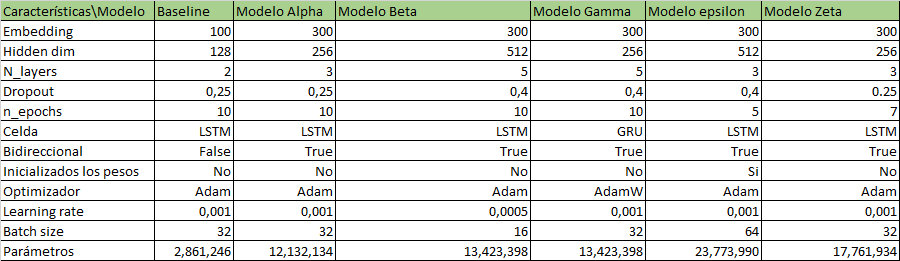


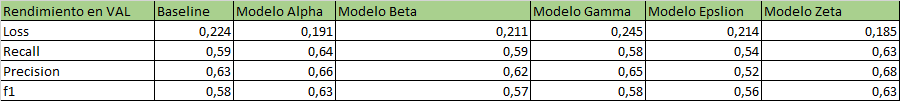

Vemos que el modelo zeta presentó en general un rendimiento superior al del baseline en sus 3 métricas consideradas para una tarea tan complicada como NER, por lo que se encontraron un buen set de parámetros (claramente no el mejor)

Estoy conforme con los resultados en esta oportunidad pues como se puede observar, el baseline ya presentaba un buen rendimiento y se consiguió una mejora sobre este, por supuesto que pudo haber sido mejor, faltó continuar investigando implementaciones cercanas al estado del arte para mejorar el rendimiento.

Investigando sobre los modelos que se utilizaron, pude aprender mucho sobre el problema de NER e incluso sobre NLP en general por lo que me llevo una buena experiencia (a pesar de no haber realizado la tarea correspondiente jajaja)